# **EDA** on Loureiro(portugal) Energy Data

Datasource link: [Loureiro_energy](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqazFRdkpiNUV6dDItZXU2MEY2eXIyeDhUd1JsQXxBQ3Jtc0tsb3Y1cHpJczM3VkFkQnRSeWszaUtva0F3dDhwY2F5VjEyTXlOcjZaTUJ6NVBzZ2I3ckxQV1pmdHVBLTd0azdEc0U5Rjd2Q3ZRdU1kVUp4UmpWSXZ2MDNNenRldzBhbHZWYXZ1OGE3bUdqSkpwLUdiaw&q=https%3A%2F%2Fdata.mendeley.com%2Fdatasets%2Fvryvyfz2tj%2F1&v=jCYjcEaNfzc)

Installation libraris:
* Using pip: 
    - `pip install numpy pandas matplotlib seaborn plotly scikit-learn`
* Using uv:
    - `uv add numpy pandas matplotlib seaborn plotly scikit-learn`

## **Data Description**

## **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Understanding the Data**

### **Reading data**


In [ ]:
data_path = "./datasets/loureiro_energy.csv"

energy = pd.read_csv(data_path)

### **Analyzing data**

In [4]:
# shape of the data

print(f"Number of rows in the data: {energy.shape[0]}")
print(f"Number of columns of data: {energy.shape[1]}")

Number of rows in the data: 46608
Number of columns of data: 173


In [5]:
# observing the head of data

energy.head()

Time  Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
0  2022-05-05 12:00:00           0.068             NaN           0.034   
1  2022-05-05 12:15:00           0.070             NaN           0.044   
2  2022-05-05 12:30:00           0.122             NaN           0.037   
3  2022-05-05 12:45:00           0.132             NaN           0.015   
4  2022-05-05 13:00:00           0.125             NaN           0.015   

   Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  Energy_Meter_7  \
0           0.038           0.000             NaN             NaN   
1           0.062           0.006             NaN             NaN   
2           0.045           0.000             NaN             NaN   
3           0.039           0.000             NaN             NaN   
4           0.040           0.032             NaN             NaN   

   Energy_Meter_8  Energy_Meter_9  ...  Energy_Meter_163  Energy_Meter_164  \
0             NaN             NaN  ...               NaN             0.004   
1             NaN             NaN  ...               NaN             0.003   
2             NaN             NaN  ...               NaN             0.004   
3             NaN             NaN  ...               NaN             0.004   
4             NaN             NaN  ...               NaN             0.004   

   Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  Energy_Meter_168  \
0               0.0               NaN               NaN               NaN   
1               0.0               NaN               NaN               NaN   
2               0.0               NaN               NaN               NaN   
3               0.0               NaN               NaN               NaN   
4               0.0               NaN               NaN               NaN   

   Energy_Meter_169  Energy_Meter_170  Energy_Meter_171  Energy_Meter_172  
0             0.395               NaN               NaN             0.008  
1             0.316               NaN               NaN             0.056  
2             0.264               NaN               NaN             0.033  
3             0.139               NaN               NaN             0.062  
4             0.138               NaN               NaN             0.024  

[5 rows x 173 columns]

In [6]:
# checking the datatypes of each column

energy.dtypes

Time                 object
Energy_Meter_1      float64
Energy_Meter_2      float64
Energy_Meter_3      float64
Energy_Meter_4      float64
                     ...   
Energy_Meter_168    float64
Energy_Meter_169    float64
Energy_Meter_170    float64
Energy_Meter_171    float64
Energy_Meter_172    float64
Length: 173, dtype: object

* Time column is "object" (so it should be date type)
* Remaining all Energy columns are "float64" (correct)

In [7]:
#proving all other columns are float64

column_dtypes = energy.dtypes.tolist()

for i in column_dtypes[1:]:
    if i != 'float64':
        print(False)
        break
print(True)

True


In [8]:
# changing the Time column datatype to datetime

energy['Time'] = pd.to_datetime(energy['Time'])

In [9]:
# checking the datatype again
energy['Time'].dtype

dtype('<M8[ns]')

In [10]:
energy.head(2)

Time  Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
0 2022-05-05 12:00:00           0.068             NaN           0.034   
1 2022-05-05 12:15:00           0.070             NaN           0.044   

   Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  Energy_Meter_7  \
0           0.038           0.000             NaN             NaN   
1           0.062           0.006             NaN             NaN   

   Energy_Meter_8  Energy_Meter_9  ...  Energy_Meter_163  Energy_Meter_164  \
0             NaN             NaN  ...               NaN             0.004   
1             NaN             NaN  ...               NaN             0.003   

   Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  Energy_Meter_168  \
0               0.0               NaN               NaN               NaN   
1               0.0               NaN               NaN               NaN   

   Energy_Meter_169  Energy_Meter_170  Energy_Meter_171  Energy_Meter_172  
0             0.395               NaN               NaN             0.008  
1             0.316               NaN               NaN             0.056  

[2 rows x 173 columns]

In [11]:
# info of the data

energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Columns: 173 entries, Time to Energy_Meter_172
dtypes: datetime64[ns](1), float64(172)
memory usage: 61.5 MB


In [12]:
# summary stats of the energy data

summary_stats = energy.describe()
summary_stats

Time  Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
count                46608    41822.000000    41748.000000    31617.000000   
mean   2023-01-03 05:52:30        0.092643        0.062613        0.116356   
min    2022-05-05 12:00:00        0.000000        0.000000        0.000000   
25%    2022-09-03 20:56:15        0.038000        0.028000        0.044000   
50%    2023-01-03 05:52:30        0.063000        0.046000        0.079000   
75%    2023-05-04 14:48:45        0.103000        0.073000        0.105000   
max    2023-09-02 23:45:00        1.513000        0.962000        1.593000   
std                    NaN        0.104881        0.065718        0.143975   

       Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  Energy_Meter_7  \
count    40510.000000    39516.000000    33408.000000     9938.000000   
mean         0.045887        0.002955        0.069740        0.024806   
min          0.000000        0.000000        0.000000        0.004000   
25%          0.013000        0.000000        0.000000        0.007000   
50%          0.032000        0.000000        0.000000        0.014000   
75%          0.045000        0.000000        0.000000        0.021000   
max          1.738000        1.032000        1.594000        0.979000   
std          0.102041        0.014699        0.286786        0.060112   

       Energy_Meter_8  Energy_Meter_9  ...  Energy_Meter_163  \
count    41731.000000    41713.000000  ...      40200.000000   
mean         0.121322        0.092286  ...          0.054436   
min          0.000000        0.000000  ...          0.000000   
25%          0.027000        0.051000  ...          0.007000   
50%          0.095000        0.072000  ...          0.008000   
75%          0.155000        0.098000  ...          0.070250   
max          1.412000        0.772000  ...          0.509000   
std          0.140283        0.087209  ...          0.076120   

       Energy_Meter_164  Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  \
count       41774.00000      39072.000000      28118.000000      16196.000000   
mean            0.00387          0.006162          0.087815          0.025371   
min             0.00000          0.000000          0.000000          0.004000   
25%             0.00300          0.000000          0.006000          0.019000   
50%             0.00400          0.000000          0.007000          0.022000   
75%             0.00400          0.000000          0.013000          0.024000   
max             0.05000          0.669000          1.530000          0.600000   
std             0.00159          0.023565          0.195815          0.023271   

       Energy_Meter_168  Energy_Meter_169  Energy_Meter_170  Energy_Meter_171  \
count      33939.000000      23845.000000      29537.000000      27170.000000   
mean           0.540594          0.157338          0.273103          0.153591   
min            0.000000          0.017000          0.000000          0.000000   
25%            0.312000          0.081000          0.142000          0.056000   
50%            0.480000          0.114000          0.164000          0.095000   
75%            0.735000          0.175000          0.371000          0.144000   
max            1.900000          0.995000          2.136000          1.803000   
std            0.287114          0.124936          0.199749          0.176724   

       Energy_Meter_172  
count      40864.000000  
mean           0.086442  
min            0.000000  
25%            0.029000  
50%            0.043000  
75%            0.067000  
max            1.609000  
std            0.140246  

[8 rows x 173 columns]

* starting date of data collection: 05-05-2022, 12:00:00 
* ending date of data collection: 02-09-2023, 23:45:00
* every row of data is a collection in 15 mins time interval

In [13]:
# checking whether all the values of Time column are not null

full_col_range = pd.date_range(start="2022-05-05 12:00:00", end="2023-09-02 23:45:00", freq="15min")
full_col_range

DatetimeIndex(['2022-05-05 12:00:00', '2022-05-05 12:15:00',
               '2022-05-05 12:30:00', '2022-05-05 12:45:00',
               '2022-05-05 13:00:00', '2022-05-05 13:15:00',
               '2022-05-05 13:30:00', '2022-05-05 13:45:00',
               '2022-05-05 14:00:00', '2022-05-05 14:15:00',
               ...
               '2023-09-02 21:30:00', '2023-09-02 21:45:00',
               '2023-09-02 22:00:00', '2023-09-02 22:15:00',
               '2023-09-02 22:30:00', '2023-09-02 22:45:00',
               '2023-09-02 23:00:00', '2023-09-02 23:15:00',
               '2023-09-02 23:30:00', '2023-09-02 23:45:00'],
              dtype='datetime64[ns]', length=46608, freq='15min')

* We got 46,608 values
* Also the dataset Time column has 46,608 non null values.
* So we can conclude that, Time column doesn't has null values

In [14]:
np.all(full_col_range == energy['Time'])

np.True_

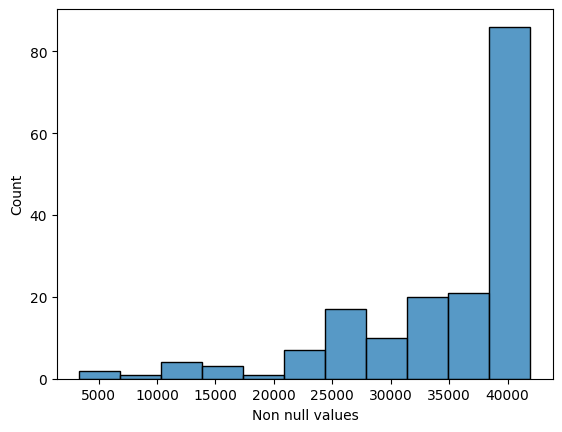

In [15]:
# histogram of number of non null values for each column

sns.histplot(summary_stats.iloc[0,1:])
plt.xlabel("Non null values")
plt.show()

* We can observe that, there are there are also columns which has only 5000 non null values
* More that 80 columns, has aroung 40k non null values

In [16]:
# checking for duplicated rows
# as the timestamps are different, we dont have duplicated rows

energy.duplicated().sum()

np.int64(0)

### Missing value analysis

In [17]:
# setting Time column as index column

energy.set_index('Time', inplace=True)

In [18]:
null_data = energy.isna().sum().reset_index()
null_data.columns = ['column', 'null values']

In [19]:
null_data.head()

column  null values
0  Energy_Meter_1         4786
1  Energy_Meter_2         4860
2  Energy_Meter_3        14991
3  Energy_Meter_4         6098
4  Energy_Meter_5         7092

In [20]:
# observing in bar graphs

fig = px.bar(null_data, x = "column", y = "null values", color="column", title="Null values in each column")
fig.show()

In [21]:
energy.head(2)

Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
Time                                                                  
2022-05-05 12:00:00           0.068             NaN           0.034   
2022-05-05 12:15:00           0.070             NaN           0.044   

                     Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  \
Time                                                                  
2022-05-05 12:00:00           0.038           0.000             NaN   
2022-05-05 12:15:00           0.062           0.006             NaN   

                     Energy_Meter_7  Energy_Meter_8  Energy_Meter_9  \
Time                                                                  
2022-05-05 12:00:00             NaN             NaN             NaN   
2022-05-05 12:15:00             NaN             NaN             NaN   

                     Energy_Meter_10  ...  Energy_Meter_163  Energy_Meter_164  \
Time                                  ...                                       
2022-05-05 12:00:00            0.007  ...               NaN             0.004   
2022-05-05 12:15:00            0.030  ...               NaN             0.003   

                     Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  \
Time                                                                        
2022-05-05 12:00:00               0.0               NaN               NaN   
2022-05-05 12:15:00               0.0               NaN               NaN   

                     Energy_Meter_168  Energy_Meter_169  Energy_Meter_170  \
Time                                                                        
2022-05-05 12:00:00               NaN             0.395               NaN   
2022-05-05 12:15:00               NaN             0.316               NaN   

                     Energy_Meter_171  Energy_Meter_172  
Time                                                     
2022-05-05 12:00:00               NaN             0.008  
2022-05-05 12:15:00               NaN             0.056  

[2 rows x 172 columns]

In [22]:
# total number of null values in the dataset

print(f"Total number of null values in the entire dataset: {energy.isna().sum().sum().item()}")
print(f"Total null vaues percentage in the entire data is: {(energy.isna().sum().sum().item())/(energy.size)*100:.2f}%")

Total number of null values in the entire dataset: 2014280
Total null vaues percentage in the entire data is: 25.13%


In [23]:
# null values histogram

perc_null_by_col = energy.isna().sum()/energy.shape[0]

perc_null_by_col.head()

Energy_Meter_1    0.102686
Energy_Meter_2    0.104274
Energy_Meter_3    0.321640
Energy_Meter_4    0.130836
Energy_Meter_5    0.152163
dtype: float64

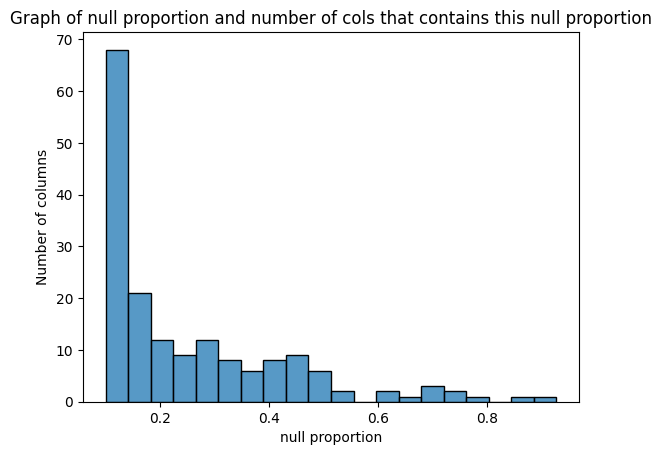

In [24]:
sns.histplot(perc_null_by_col, bins=20)
plt.xlabel("null proportion")
plt.ylabel('Number of columns')
plt.title("Graph of null proportion and number of cols that contains this null proportion")
plt.show()

* There are columns, where number of null values are more than 80%
* There are more columns, whose null values are below 20%

In [25]:
perc_null_by_col.sort_values(ascending=True)

Energy_Meter_140    0.100154
Energy_Meter_91     0.102300
Energy_Meter_132    0.102321
Energy_Meter_17     0.102364
Energy_Meter_125    0.102493
                      ...   
Energy_Meter_97     0.734359
Energy_Meter_93     0.748884
Energy_Meter_7      0.786775
Energy_Meter_46     0.860990
Energy_Meter_38     0.927802
Length: 172, dtype: float64

We can observe that,
* meters: 140, 91, 132, 17, 125 collects less null values
* meters: 38, 46, 7, 93, 97 collects very high null values

Energy_Meter_140
Energy_Meter_91
Energy_Meter_132
Energy_Meter_17
Energy_Meter_125


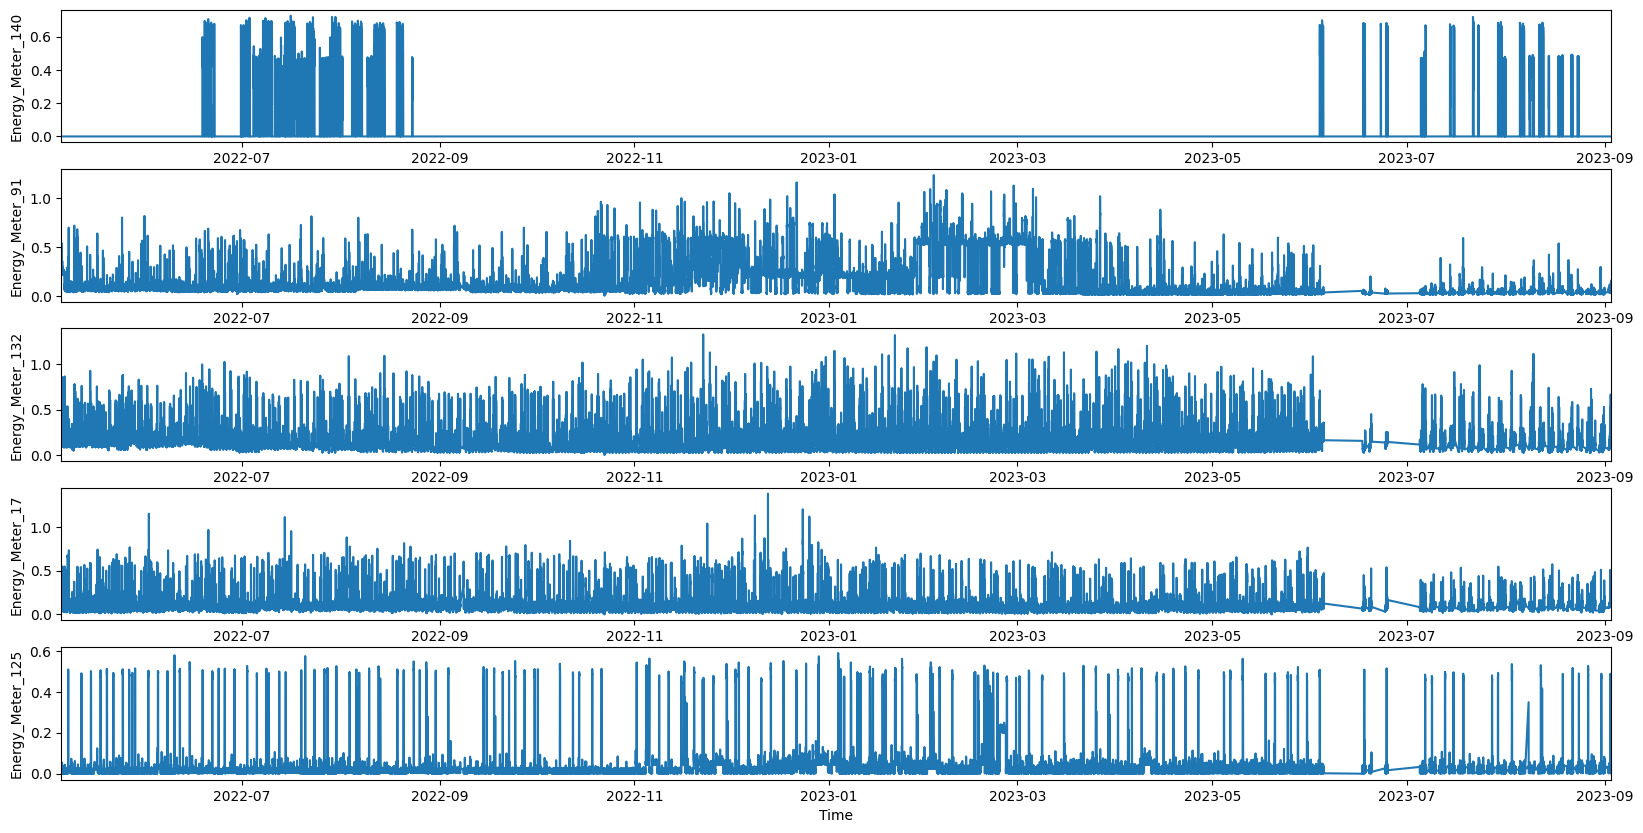

In [26]:
low_null_val_meters = perc_null_by_col.sort_values(ascending=True).index[:5]

fig, ax = plt.subplots(nrows=5, figsize=(20,10))
for i,col in enumerate(low_null_val_meters):
    print(col)
    plt1 = sns.lineplot(energy[col], ax=ax[i])
    plt1.set_xlim(energy.index.min(), energy.index.max())

Energy_Meter_38
Energy_Meter_46
Energy_Meter_7
Energy_Meter_93
Energy_Meter_97


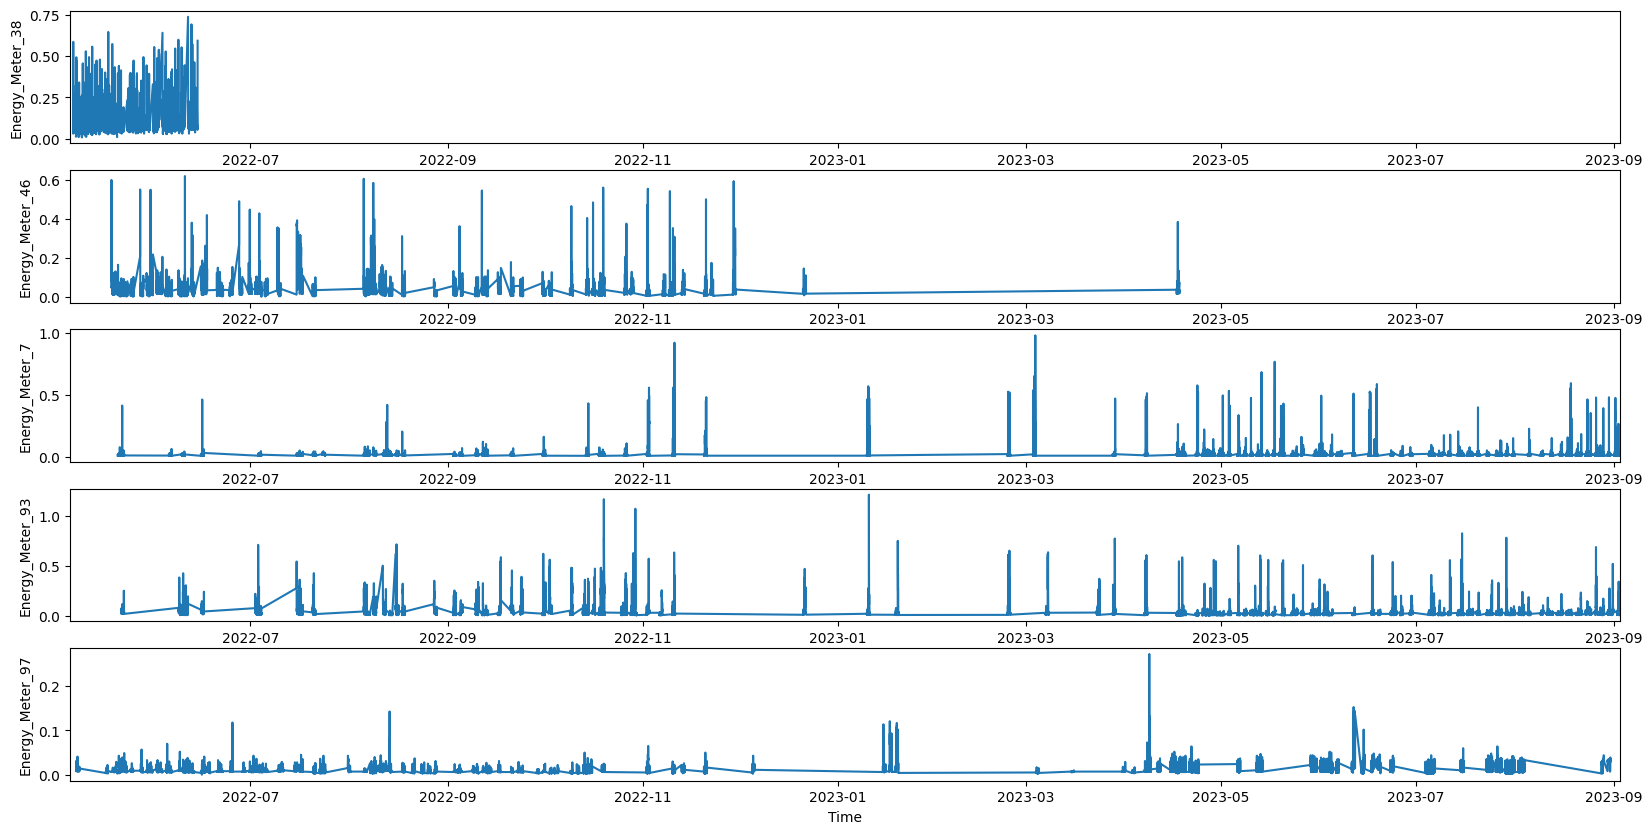

In [27]:
high_null_val_meters = perc_null_by_col.sort_values(ascending=False).index[:5]

fig, ax = plt.subplots(nrows=5, figsize=(20,10))
for i,col in enumerate(high_null_val_meters):
    print(col)
    plt1 = sns.lineplot(energy[col], ax=ax[i])
    plt1.set_xlim(energy.index.min(), energy.index.max())

In [28]:
# we can observe the null values more clearly

px.line(energy['Energy_Meter_97']).show()

In [29]:
# number of null values in each row

energy.isna().sum(axis=1)

Time
2022-05-05 12:00:00    84
2022-05-05 12:15:00    84
2022-05-05 12:30:00    84
2022-05-05 12:45:00    84
2022-05-05 13:00:00    84
                       ..
2023-09-02 22:45:00     7
2023-09-02 23:00:00     7
2023-09-02 23:15:00     7
2023-09-02 23:30:00     7
2023-09-02 23:45:00     7
Length: 46608, dtype: int64

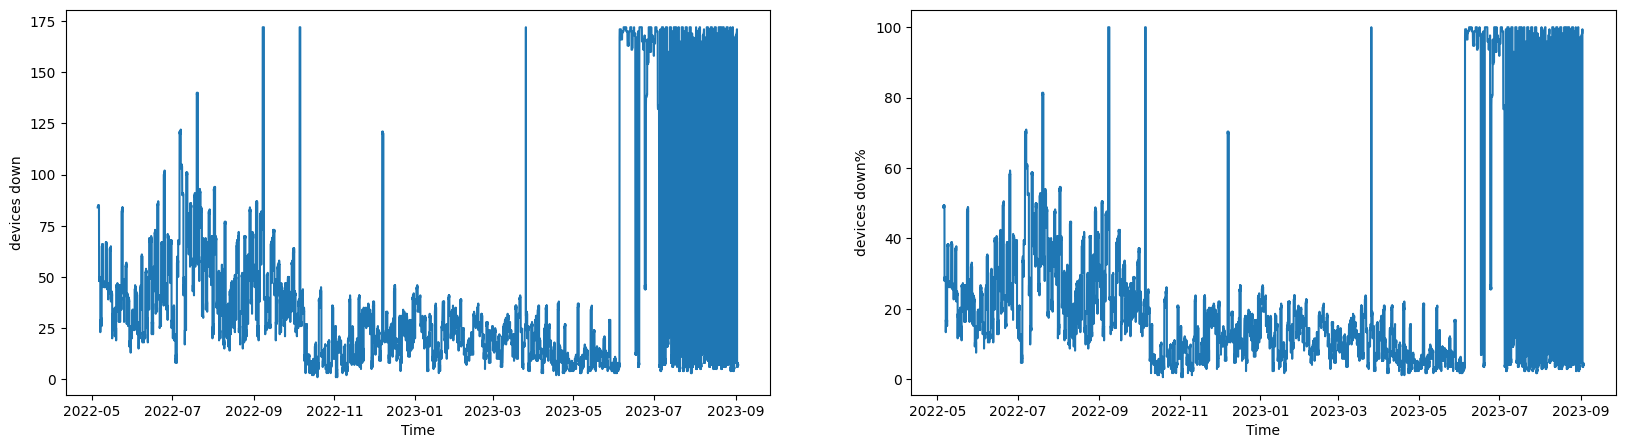

In [30]:
# plotting the null count and null percentage

null_count_row = energy.isna().sum(axis = 1).reset_index()
null_count_row.columns = ['Time', 'Null_count']

perc_null_count_row = null_count_row.copy()
perc_null_count_row['Null_count'] = perc_null_count_row['Null_count']/energy.shape[1]*100

fig, ax = plt.subplots(ncols=2, figsize = (20,5))
sns.lineplot(null_count_row, x = 'Time', y = 'Null_count', ax = ax[0])
sns.lineplot(perc_null_count_row, x = 'Time', y = 'Null_count', ax = ax[1])
ax[1].set_ylabel('devices down%')
ax[0].set_ylabel('devices down')
plt.show()

In [31]:
# for clear observation

px.line(perc_null_count_row, x = 'Time', y = 'Null_count', title = "Devices down % per day").show()

### **Correlation Analysis between devices**

In [32]:
# meters that were correlated to each other 

corr_mat = energy.corr()
corr_mat

Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
Energy_Meter_1          1.000000        0.028078        0.115541   
Energy_Meter_2          0.028078        1.000000        0.059194   
Energy_Meter_3          0.115541        0.059194        1.000000   
Energy_Meter_4          0.010398        0.012637       -0.036977   
Energy_Meter_5         -0.001674        0.027998        0.024649   
...                          ...             ...             ...   
Energy_Meter_168       -0.218576        0.097117       -0.127227   
Energy_Meter_169        0.142029        0.093672        0.160424   
Energy_Meter_170       -0.039801        0.093013       -0.130972   
Energy_Meter_171        0.128228        0.106019        0.206534   
Energy_Meter_172        0.083597        0.068984        0.145596   

                  Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  \
Energy_Meter_1          0.010398       -0.001674        0.045189   
Energy_Meter_2          0.012637        0.027998        0.033551   
Energy_Meter_3         -0.036977        0.024649       -0.055819   
Energy_Meter_4          1.000000       -0.008297        0.132062   
Energy_Meter_5         -0.008297        1.000000       -0.000623   
...                          ...             ...             ...   
Energy_Meter_168       -0.005520        0.077548       -0.081782   
Energy_Meter_169        0.046928        0.037775        0.036364   
Energy_Meter_170       -0.029221        0.027226        0.059964   
Energy_Meter_171       -0.011218        0.016747        0.012746   
Energy_Meter_172       -0.014489        0.023461        0.026911   

                  Energy_Meter_7  Energy_Meter_8  Energy_Meter_9  \
Energy_Meter_1          0.026084        0.108648        0.020419   
Energy_Meter_2          0.017705        0.038464        0.094731   
Energy_Meter_3          0.112044        0.141335       -0.020238   
Energy_Meter_4         -0.006452       -0.067196        0.027745   
Energy_Meter_5          0.000996        0.050430        0.024247   
...                          ...             ...             ...   
Energy_Meter_168       -0.012596        0.036456        0.089017   
Energy_Meter_169        0.091371        0.129065        0.125607   
Energy_Meter_170        0.041609        0.122328        0.230956   
Energy_Meter_171        0.077927        0.117298        0.145629   
Energy_Meter_172        0.072043        0.142786        0.084494   

                  Energy_Meter_10  ...  Energy_Meter_163  Energy_Meter_164  \
Energy_Meter_1           0.049444  ...         -0.055050          0.006682   
Energy_Meter_2           0.035722  ...          0.099250          0.002332   
Energy_Meter_3           0.078368  ...          0.074718         -0.002226   
Energy_Meter_4           0.006788  ...         -0.062027         -0.058128   
Energy_Meter_5           0.008590  ...          0.072337         -0.001617   
...                           ...  ...               ...               ...   
Energy_Meter_168         0.017236  ...          0.195335         -0.008385   
Energy_Meter_169         0.077859  ...          0.066045          0.011864   
Energy_Meter_170         0.054352  ...          0.359079         -0.023636   
Energy_Meter_171         0.061579  ...          0.057438          0.003247   
Energy_Meter_172         0.077659  ...          0.169976         -0.010952   

                  Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  \
Energy_Meter_1            0.051611          0.002260          0.030649   
Energy_Meter_2            0.003558          0.022607          0.030969   
Energy_Meter_3           -0.033593         -0.095729          0.000494   
Energy_Meter_4            0.022030         -0.006557          0.062274   
Energy_Meter_5           -0.003704          0.025247         -0.001865   
...                            ...               ...               ...   
Energy_Meter_168         -0.109084          0.188207         -0.078133   
Energy_Meter_169          0.037054    

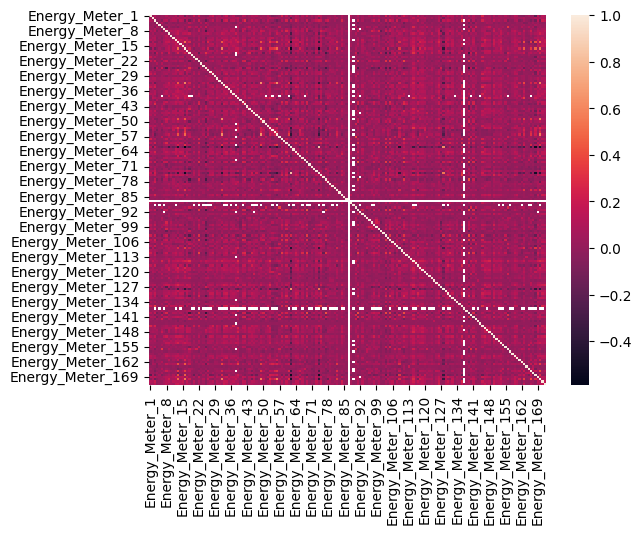

In [33]:
sns.heatmap(corr_mat)
plt.show()

* The lighter the color, the higher they are +vely correlated
* The darker the color, the higher they are -vely correlated
* Absolutely, the diagonal values are lighter.
* But if we observe, there are some columns which are lighter (from the heatmap, we can observe)

(np.float64(19117.5), np.float64(19602.989583333332))

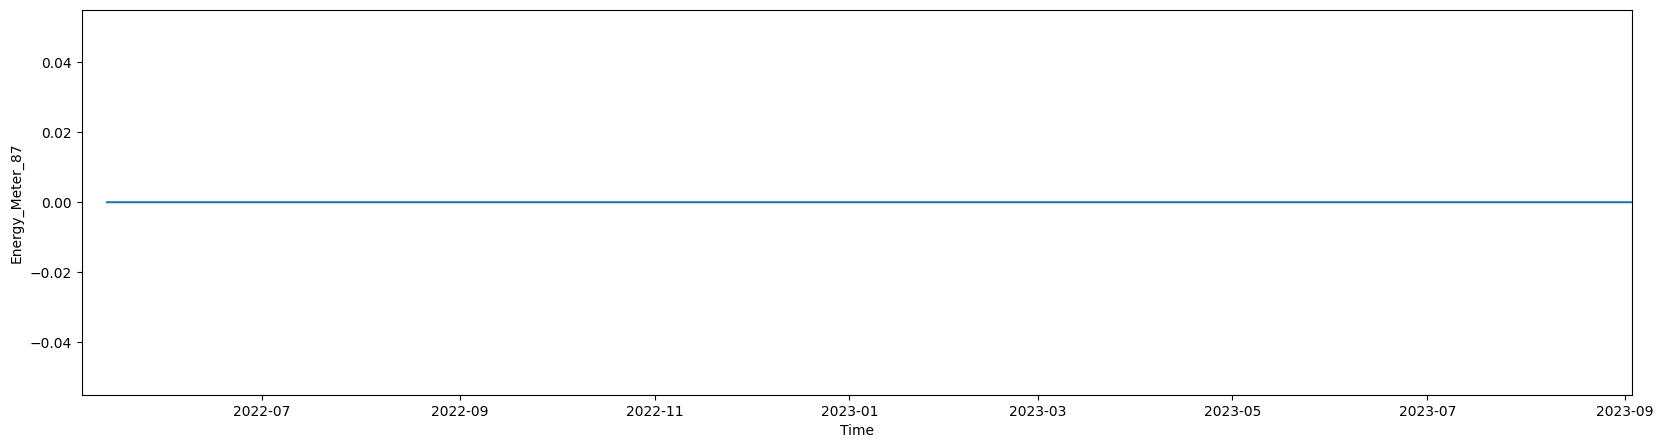

In [34]:
plt.figure(figsize=(20,5))
sns.lineplot(energy['Energy_Meter_87'])
plt.xlim(energy.index.min(), energy.index.max())

We can observe, that for the meter_87, its value is 0 for the whole dates (may be not working well)
* because of this reason, a row with light color is appearing in the heatmap
* We can remove that meter, as it didn't take any electricity reading( or electricity is not using at that meter fixed location)

(np.float64(19117.5), np.float64(19602.989583333332))

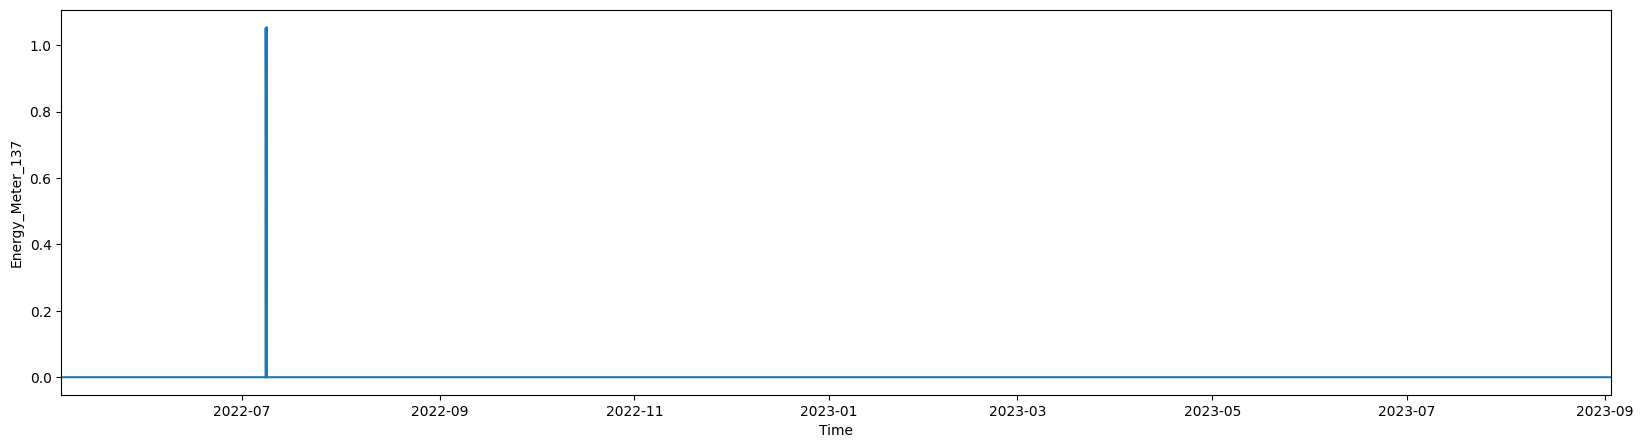

In [35]:
plt.figure(figsize=(20,5))
sns.lineplot(energy['Energy_Meter_137'])
plt.xlim(energy.index.min(), energy.index.max())

* We can observe, only one spike is there, remaining all days, no electricity is consumed
* May be that particular period, electricity was consumed

In [36]:
# As there is redundant information in the heatmap, we are removing the lower traiangular matrix

li = np.tril_indices(energy.shape[1])
traingular_corr = corr_mat.copy().to_numpy()

traingular_corr[li] = np.nan

traingular_corr = pd.DataFrame(traingular_corr, columns=corr_mat.columns, index=corr_mat.index)


In [37]:
traingular_corr

Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
Energy_Meter_1               NaN        0.028078        0.115541   
Energy_Meter_2               NaN             NaN        0.059194   
Energy_Meter_3               NaN             NaN             NaN   
Energy_Meter_4               NaN             NaN             NaN   
Energy_Meter_5               NaN             NaN             NaN   
...                          ...             ...             ...   
Energy_Meter_168             NaN             NaN             NaN   
Energy_Meter_169             NaN             NaN             NaN   
Energy_Meter_170             NaN             NaN             NaN   
Energy_Meter_171             NaN             NaN             NaN   
Energy_Meter_172             NaN             NaN             NaN   

                  Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  \
Energy_Meter_1          0.010398       -0.001674        0.045189   
Energy_Meter_2          0.012637        0.027998        0.033551   
Energy_Meter_3         -0.036977        0.024649       -0.055819   
Energy_Meter_4               NaN       -0.008297        0.132062   
Energy_Meter_5               NaN             NaN       -0.000623   
...                          ...             ...             ...   
Energy_Meter_168             NaN             NaN             NaN   
Energy_Meter_169             NaN             NaN             NaN   
Energy_Meter_170             NaN             NaN             NaN   
Energy_Meter_171             NaN             NaN             NaN   
Energy_Meter_172             NaN             NaN             NaN   

                  Energy_Meter_7  Energy_Meter_8  Energy_Meter_9  \
Energy_Meter_1          0.026084        0.108648        0.020419   
Energy_Meter_2          0.017705        0.038464        0.094731   
Energy_Meter_3          0.112044        0.141335       -0.020238   
Energy_Meter_4         -0.006452       -0.067196        0.027745   
Energy_Meter_5          0.000996        0.050430        0.024247   
...                          ...             ...             ...   
Energy_Meter_168             NaN             NaN             NaN   
Energy_Meter_169             NaN             NaN             NaN   
Energy_Meter_170             NaN             NaN             NaN   
Energy_Meter_171             NaN             NaN             NaN   
Energy_Meter_172             NaN             NaN             NaN   

                  Energy_Meter_10  ...  Energy_Meter_163  Energy_Meter_164  \
Energy_Meter_1           0.049444  ...         -0.055050          0.006682   
Energy_Meter_2           0.035722  ...          0.099250          0.002332   
Energy_Meter_3           0.078368  ...          0.074718         -0.002226   
Energy_Meter_4           0.006788  ...         -0.062027         -0.058128   
Energy_Meter_5           0.008590  ...          0.072337         -0.001617   
...                           ...  ...               ...               ...   
Energy_Meter_168              NaN  ...               NaN               NaN   
Energy_Meter_169              NaN  ...               NaN               NaN   
Energy_Meter_170              NaN  ...               NaN               NaN   
Energy_Meter_171              NaN  ...               NaN               NaN   
Energy_Meter_172              NaN  ...               NaN               NaN   

                  Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  \
Energy_Meter_1            0.051611          0.002260          0.030649   
Energy_Meter_2            0.003558          0.022607          0.030969   
Energy_Meter_3           -0.033593         -0.095729          0.000494   
Energy_Meter_4            0.022030         -0.006557          0.062274   
Energy_Meter_5           -0.003704          0.025247         -0.001865   
...                            ...               ...               ...   
Energy_Meter_168               NaN               NaN               NaN   
Energy_Meter_169               NaN    

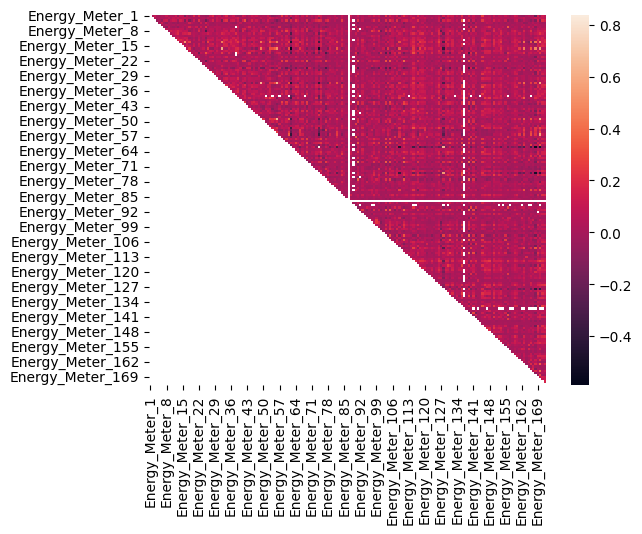

In [38]:
sns.heatmap(traingular_corr)
plt.show()

<Axes: >

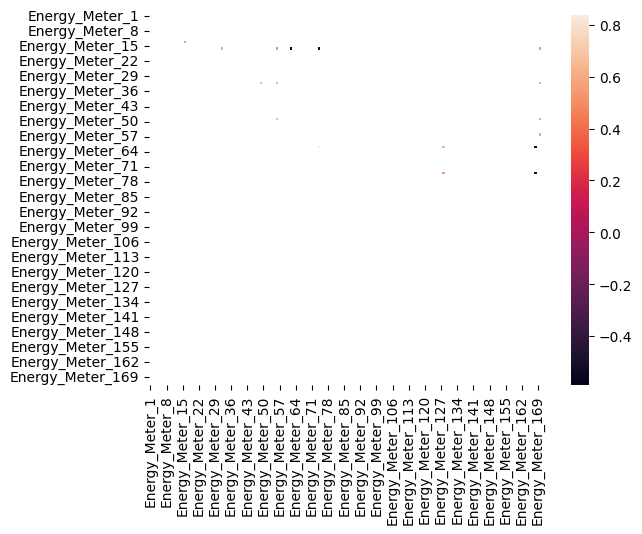

In [39]:
high_corr_data = traingular_corr[(traingular_corr>0.5)&(traingular_corr<1)|(traingular_corr<-0.5)]

sns.heatmap(high_corr_data)

We can observe that, some points are there which are highly +vely or -vely correlated

In [40]:
# highly correlated rows

for row in high_corr_data:
    for j, cell in enumerate(high_corr_data[row]):
        if np.isnan(cell) == False:
            if cell < 0:
                print(f"{row} - {high_corr_data.columns[j]} --> {cell} --(-vely correlated)")
            else:
                print(f"{row} - {high_corr_data.columns[j]} --> {cell} --(+vely correlated)")

Energy_Meter_16 - Energy_Meter_13 --> 0.5198573813342061 --(+vely correlated)
Energy_Meter_32 - Energy_Meter_16 --> 0.589572270846768 --(+vely correlated)
Energy_Meter_49 - Energy_Meter_32 --> 0.6398352760639234 --(+vely correlated)
Energy_Meter_56 - Energy_Meter_16 --> 0.5089606314442484 --(+vely correlated)
Energy_Meter_56 - Energy_Meter_32 --> 0.6232417416634765 --(+vely correlated)
Energy_Meter_56 - Energy_Meter_49 --> 0.6574558177598908 --(+vely correlated)
Energy_Meter_62 - Energy_Meter_16 --> -0.5869369063441462 --(-vely correlated)
Energy_Meter_74 - Energy_Meter_16 --> -0.5203511008044513 --(-vely correlated)
Energy_Meter_74 - Energy_Meter_62 --> 0.8366684465322936 --(+vely correlated)
Energy_Meter_128 - Energy_Meter_62 --> 0.6353831199427828 --(+vely correlated)
Energy_Meter_128 - Energy_Meter_74 --> 0.5415537217782208 --(+vely correlated)
Energy_Meter_168 - Energy_Meter_62 --> -0.5369415090488009 --(-vely correlated)
Energy_Meter_168 - Energy_Meter_74 --> -0.5028392784284538 

Above variables are more correlated to each other

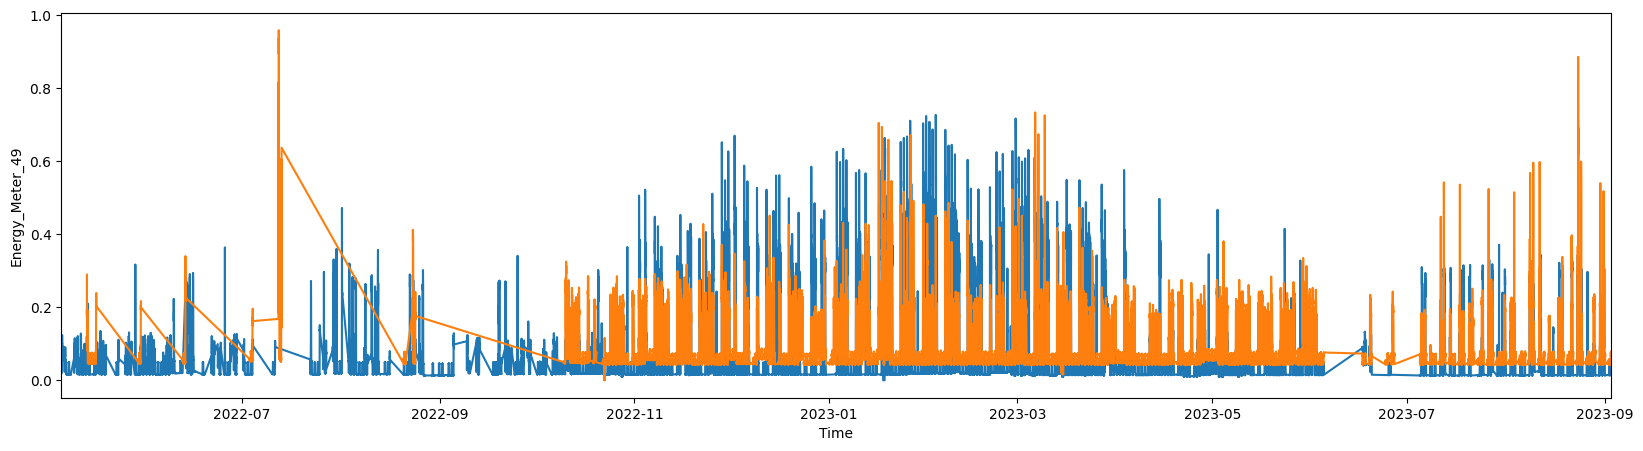

In [41]:
# observing the correlated data

plt.figure(figsize=(20,5))
sns.lineplot(energy['Energy_Meter_49'])
sns.lineplot(energy['Energy_Meter_32'])
plt.xlim(energy.index.min(), energy.index.max())
plt.show()


### **some observations**

Making some observations on monthly patterns, yearly patterns, ...

In [42]:
# scaling the data

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [43]:
scaled_energy = std_scaler.fit_transform(energy.to_numpy())

energy_scaled_df = pd.DataFrame(scaled_energy, columns=energy.columns, index=energy.index)

In [44]:
energy_scaled_df.head(3)

Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
Time                                                                  
2022-05-05 12:00:00       -0.234968             NaN       -0.572023   
2022-05-05 12:15:00       -0.215898             NaN       -0.502566   
2022-05-05 12:30:00        0.279906             NaN       -0.551186   

                     Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  \
Time                                                                  
2022-05-05 12:00:00       -0.077290       -0.201075             NaN   
2022-05-05 12:15:00        0.157913        0.207132             NaN   
2022-05-05 12:30:00       -0.008689       -0.201075             NaN   

                     Energy_Meter_7  Energy_Meter_8  Energy_Meter_9  \
Time                                                                  
2022-05-05 12:00:00             NaN             NaN             NaN   
2022-05-05 12:15:00             NaN             NaN             NaN   
2022-05-05 12:30:00             NaN             NaN             NaN   

                     Energy_Meter_10  ...  Energy_Meter_163  Energy_Meter_164  \
Time                                  ...                                       
2022-05-05 12:00:00        -0.334447  ...               NaN          0.082047   
2022-05-05 12:15:00         0.528066  ...               NaN         -0.546836   
2022-05-05 12:30:00        -0.484450  ...               NaN          0.082047   

                     Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  \
Time                                                                        
2022-05-05 12:00:00         -0.261512               NaN               NaN   
2022-05-05 12:15:00         -0.261512               NaN               NaN   
2022-05-05 12:30:00         -0.261512               NaN               NaN   

                     Energy_Meter_168  Energy_Meter_169  Energy_Meter_170  \
Time                                                                        
2022-05-05 12:00:00               NaN          1.902315               NaN   
2022-05-05 12:15:00               NaN          1.269976               NaN   
2022-05-05 12:30:00               NaN          0.853753               NaN   

                     Energy_Meter_171  Energy_Meter_172  
Time                                                     
2022-05-05 12:00:00               NaN         -0.559324  
2022-05-05 12:15:00               NaN         -0.217065  
2022-05-05 12:30:00               NaN         -0.381064  

[3 rows x 172 columns]

### **Feature Engineering**

In [45]:
energy_scaled_df = energy_scaled_df.reset_index()

In [46]:
energy_scaled_df.head(2)

Time  Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
0 2022-05-05 12:00:00       -0.234968             NaN       -0.572023   
1 2022-05-05 12:15:00       -0.215898             NaN       -0.502566   

   Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  Energy_Meter_7  \
0       -0.077290       -0.201075             NaN             NaN   
1        0.157913        0.207132             NaN             NaN   

   Energy_Meter_8  Energy_Meter_9  ...  Energy_Meter_163  Energy_Meter_164  \
0             NaN             NaN  ...               NaN          0.082047   
1             NaN             NaN  ...               NaN         -0.546836   

   Energy_Meter_165  Energy_Meter_166  Energy_Meter_167  Energy_Meter_168  \
0         -0.261512               NaN               NaN               NaN   
1         -0.261512               NaN               NaN               NaN   

   Energy_Meter_169  Energy_Meter_170  Energy_Meter_171  Energy_Meter_172  
0          1.902315               NaN               NaN         -0.559324  
1          1.269976               NaN               NaN         -0.217065  

[2 rows x 173 columns]

In [47]:
energy_scaled_df['MonthOfYear'] =[str(n).zfill(2)+"-"+m for n, m in zip(energy_scaled_df.Time.dt.month, energy_scaled_df.Time.dt.month_name())]

In [48]:
energy_scaled_df['DayOfWeek'] = [str(n).zfill(2)+"-"+m for n, m in zip(energy_scaled_df.Time.dt.dayofweek, energy_scaled_df.Time.dt.day_name())]

In [49]:
energy_scaled_df['Day'] = energy_scaled_df.Time.dt.to_period("D")
energy_scaled_df['Hour'] = energy_scaled_df.Time.dt.to_period("h")

In [50]:
print(energy_scaled_df['MonthOfYear'].dtype)
print(energy_scaled_df['DayOfWeek'].dtype)
print(energy_scaled_df['Day'].dtype)
print(energy_scaled_df['Hour'].dtype)

object
object
period[D]
period[h]


In [51]:
energy_scaled_df.head(2)

Time  Energy_Meter_1  Energy_Meter_2  Energy_Meter_3  \
0 2022-05-05 12:00:00       -0.234968             NaN       -0.572023   
1 2022-05-05 12:15:00       -0.215898             NaN       -0.502566   

   Energy_Meter_4  Energy_Meter_5  Energy_Meter_6  Energy_Meter_7  \
0       -0.077290       -0.201075             NaN             NaN   
1        0.157913        0.207132             NaN             NaN   

   Energy_Meter_8  Energy_Meter_9  ...  Energy_Meter_167  Energy_Meter_168  \
0             NaN             NaN  ...               NaN               NaN   
1             NaN             NaN  ...               NaN               NaN   

   Energy_Meter_169  Energy_Meter_170  Energy_Meter_171  Energy_Meter_172  \
0          1.902315               NaN               NaN         -0.559324   
1          1.269976               NaN               NaN         -0.217065   

   MonthOfYear    DayOfWeek         Day              Hour  
0       05-May  03-Thursday  2022-05-05  2022-05-05 12:00  
1       05-May  03-Thursday  2022-05-05  2022-05-05 12:00  

[2 rows x 177 columns]

In [52]:
cols = [i for i in energy_scaled_df.columns if i.startswith("Energy_")]
cols.append("MonthOfYear")

In [53]:
energy_scaled_df = energy_scaled_df.set_index('Time')

In [54]:
# finding average electricity consumption per month

energy_scaled_df[cols].melt(id_vars="MonthOfYear")

MonthOfYear          variable     value
0              05-May    Energy_Meter_1 -0.234968
1              05-May    Energy_Meter_1 -0.215898
2              05-May    Energy_Meter_1  0.279906
3              05-May    Energy_Meter_1  0.375253
4              05-May    Energy_Meter_1  0.308510
...               ...               ...       ...
8016571  09-September  Energy_Meter_172 -0.224195
8016572  09-September  Energy_Meter_172 -0.174282
8016573  09-September  Energy_Meter_172 -0.452368
8016574  09-September  Energy_Meter_172 -0.366803
8016575  09-September  Energy_Meter_172 -0.373933

[8016576 rows x 3 columns]

In [55]:
monthly = energy_scaled_df[cols].melt(id_vars="MonthOfYear")
monthly = monthly.rename(columns={"value":"avg_load"})[['MonthOfYear', 'avg_load']]
monthly

MonthOfYear  avg_load
0              05-May -0.234968
1              05-May -0.215898
2              05-May  0.279906
3              05-May  0.375253
4              05-May  0.308510
...               ...       ...
8016571  09-September -0.224195
8016572  09-September -0.174282
8016573  09-September -0.452368
8016574  09-September -0.366803
8016575  09-September -0.373933

[8016576 rows x 2 columns]

In [56]:
avg_monthly = monthly.groupby('MonthOfYear').mean()
avg_monthly

avg_load
MonthOfYear           
01-January    0.120903
02-February   0.067801
03-March      0.006814
04-April     -0.081118
05-May       -0.081040
06-June      -0.048951
07-July       0.054509
08-August     0.034297
09-September -0.058814
10-October   -0.055485
11-November  -0.023831
12-December   0.094204

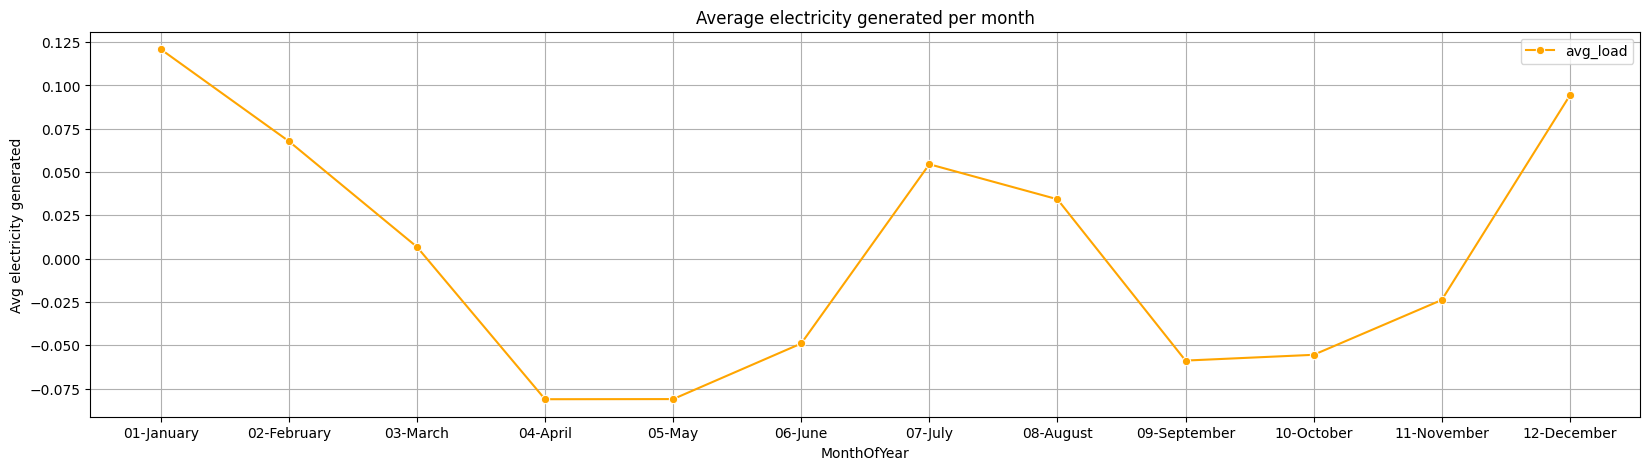

In [57]:
fig, ax = plt.subplots(figsize = (20,5))
av_m = sns.lineplot(avg_monthly, palette=['orange'], markers='o')
av_m.set_ylabel('Avg electricity generated')
av_m.set_title('Average electricity generated per month')
plt.grid()
plt.show()

In [58]:
std_monthly = monthly.rename(columns = {"avg_load":"std_load"})[['MonthOfYear', 'std_load']].groupby("MonthOfYear").std()

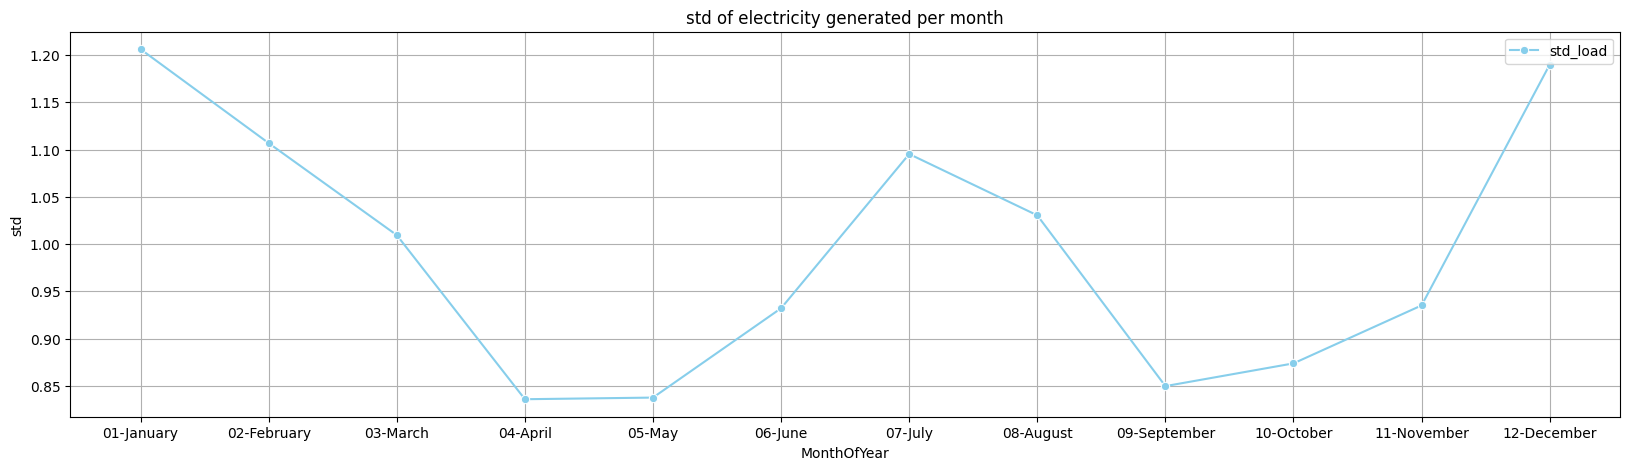

In [59]:
fig, ax = plt.subplots(figsize = (20,5))
av_m = sns.lineplot(std_monthly, palette=['skyblue'], markers='o')
av_m.set_ylabel('std')
av_m.set_title('std of electricity generated per month')
plt.grid()
plt.show()

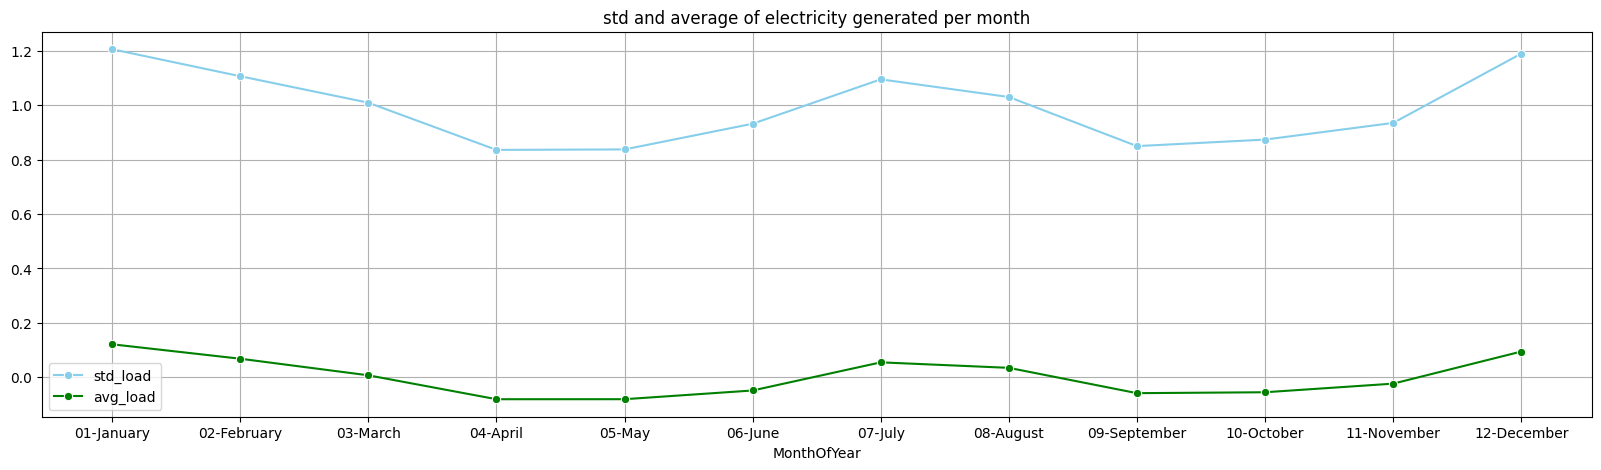

In [60]:
fig, ax = plt.subplots(figsize = (20,5))
av_m = sns.lineplot(std_monthly, palette=['skyblue'], markers='o')
sns.lineplot(avg_monthly, palette = ['green'], markers = 'o')
av_m.set_title('std and average of electricity generated per month')
plt.grid()
plt.show()

In [64]:
energy_scaled_df = energy_scaled_df.reset_index()

In [66]:
energy_scaled_df['month'] = energy_scaled_df.Time.dt.to_period('M')

In [68]:
energy_scaled_df = energy_scaled_df.set_index('Time')

In [69]:
cols = [i for i in energy_scaled_df.columns if i.startswith('Energy_')]
cols.append("month")

In [ ]:
monthly_usage = energy_scaled_df[cols].groupby('month').sum().reset_index()
monthly_usage

In [75]:
monthly_usage = monthly_usage.melt(id_vars="month")

In [ ]:
monthly_usage

month          variable       value
0     2022-05    Energy_Meter_1 -393.441855
1     2022-06    Energy_Meter_1 -317.512701
2     2022-07    Energy_Meter_1   86.449534
3     2022-08    Energy_Meter_1  161.566634
4     2022-09    Energy_Meter_1 -376.163516
...       ...               ...         ...
2919  2023-05  Energy_Meter_172  107.020467
2920  2023-06  Energy_Meter_172  -42.968838
2921  2023-07  Energy_Meter_172  -83.763201
2922  2023-08  Energy_Meter_172  -62.620278
2923  2023-09  Energy_Meter_172   24.863665

[2924 rows x 3 columns]

In [78]:
monthly_usage = monthly_usage.rename(columns={'variable':'meter_id', 'value':"Kwh"})

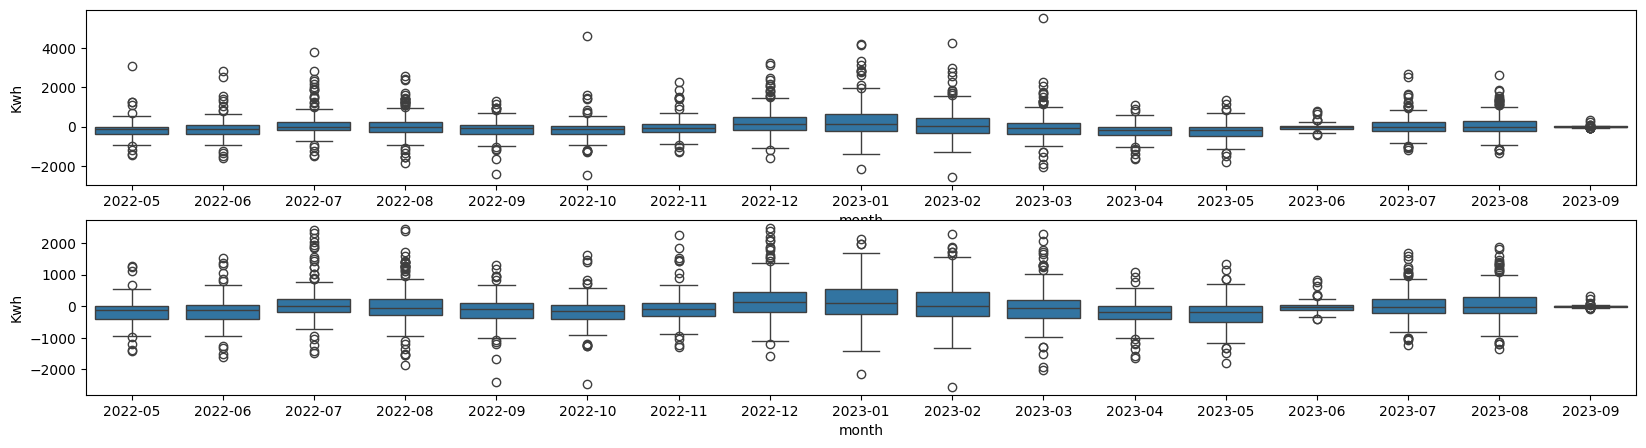

In [85]:
fig, ax = plt.subplots(nrows=2, figsize = (20, 5))
sns.boxplot(monthly_usage, x = 'month', y = 'Kwh', ax = ax[0])
sns.boxplot(monthly_usage[monthly_usage.Kwh<2500], x = 'month', y = 'Kwh', ax = ax[1])
plt.show()